In [ ]:
# Project Title: Aerial Object Classification Using Deep Learning (Bird vs Drone)

In [ ]:
# Type: Supervised Classification

In [ ]:
# Contribution: Individual
#     By Suzi Sharma

In [ ]:
# Problem Statement:
# Airspace safety, wildlife monitoring, and security operations increasingly rely on automated aerial surveillance systems. However, a major challenge in
# these environments is accurately distinguishing between birds and drones, especially when captured from aerial or long-distance cameras. Birds often 
# fly unpredictably and resemble certain types of drones in shape and motion, while drones pose security threats when entering restricted airspace. 
# Misclassifying a drone as a bird—or vice versa—can lead to serious consequences such as security breaches, airport shutdowns, or wildlife harm.
# The objective of this project is to develop a deep learning-based image classification system that can automatically identify whether an aerial object 
# in an image is a Bird or a Drone. The model must be accurate, robust, and capable of handling diverse backgrounds and lighting conditions. This 
# solution aims to support real-time decision-making in security surveillance, wildlife protection, airport safety, and environmental research 
# applications.

In [ ]:
# Project Summary

# This project focuses on building an AI-powered solution that can automatically classify aerial objects as either Bird or Drone using advanced deep 
# learning techniques. With drones becoming increasingly accessible and birds being an integral part of ecosystems, there is a critical need for 
# automatic systems that can differentiate between the two, especially in sensitive zones such as airports, wildlife sanctuaries, and defense airspaces.

# The project begins by acquiring and understanding a labeled dataset containing separate folders for birds and drones across training, validation, and 
# testing sets. These images come from real-world aerial scenarios involving diverse backgrounds, angles, and lighting conditions. The dataset structure 
# supports supervised learning, enabling the model to learn from labeled examples.

# To prepare the data, image preprocessing techniques such as normalization, resizing, and augmentation are applied. Augmentations like flipping, 
# rotation, and zooming help the model generalize better and avoid overfitting. Images are resized to 224×224 pixels to maintain computational efficiency
# while preserving important visual details.

# Two deep learning approaches are explored in this project. The first is a custom CNN model built from scratch, consisting of multiple convolutional, 
# pooling, batch normalization, dropout, and dense layers. Although lightweight and easy to train, the custom CNN achieves competitive accuracy. However,
# to further improve results, a more powerful transfer learning model is employed — MobileNetV2, a pre-trained convolutional neural network trained on 
# ImageNet. Only the top layers are fine-tuned while the base layers remain frozen, enabling efficient feature extraction with minimal training time. 
# MobileNetV2 outperforms the custom CNN in terms of accuracy, generalisation, and stability.

# The trained model is then evaluated using metrics such as accuracy, precision, recall, F1-score, and confusion matrix. The MobileNet model achieves 
# high performance and is selected as the final model for deployment.

# For deployment, a Streamlit web application is created, allowing users to upload an image and receive instant predictions. The app preprocesses the 
# image, feeds it into the model, and displays whether the object is a bird or drone along with a confidence score. This makes the solution accessible, 
# interactive, and suitable for real-world use cases.

# Overall, this project successfully demonstrates how deep learning and computer vision can solve an important aerial surveillance challenge. The system
# can be expanded with object detection models like YOLO, integrated into live camera feeds, or deployed on edge devices for real-time monitoring. The 
# solution serves as a foundation for advanced aerial intelligence applications in security, wildlife protection, and aviation safety.

In [2]:
# 1. Setup & Imports

In [1]:
# ------------------------------------------
# 1. IMPORTS
# ------------------------------------------
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
# 2. Dataset Paths

In [7]:
DATASET_PATH = r"C:\Users\HP\Desktop\Edureka\Aerial_Object_Classification_Detection\classification_dataset"   # <-- update path if needed

IMG_SIZE = 224
BATCH_SIZE = 32


In [5]:
# 3. Data Generators

In [8]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
).flow_from_directory(
    os.path.join(DATASET_PATH, "train"),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

valid_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    os.path.join(DATASET_PATH, "valid"),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    os.path.join(DATASET_PATH, "test"),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)


Found 2662 images belonging to 2 classes.
Found 442 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


In [10]:
# 4. Visualize Samples

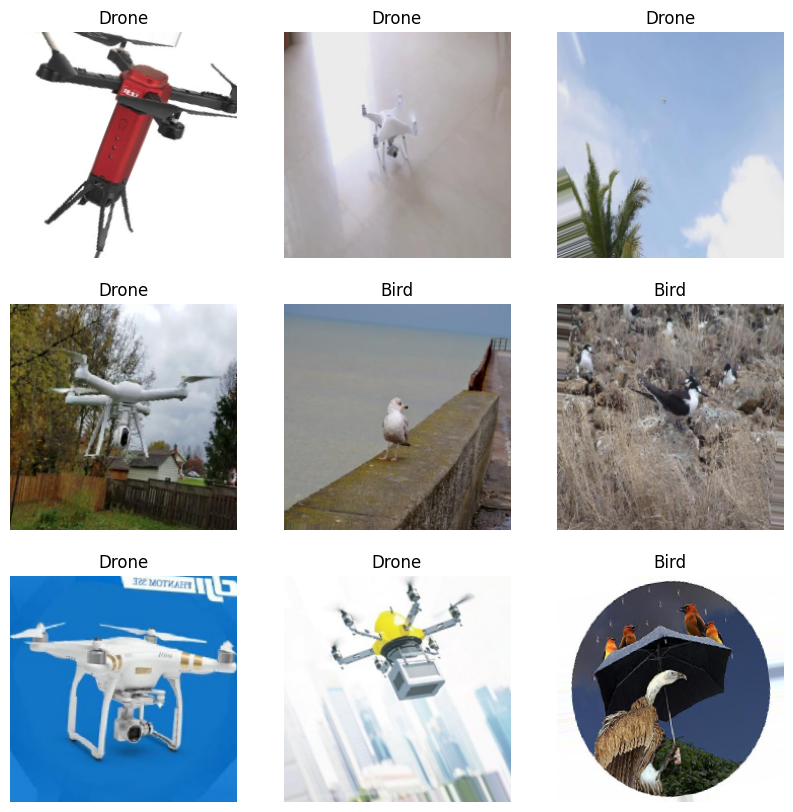

In [9]:
imgs, labels = next(train_gen)
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(imgs[i])
    plt.title("Bird" if labels[i]==0 else "Drone")
    plt.axis("off")
plt.show()


In [11]:
# 5. Build Custom CNN

In [12]:
custom_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

custom_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

custom_model.summary()


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# 6. Train Custom CNN

In [14]:
checkpoint_cnn = tf.keras.callbacks.ModelCheckpoint(
    "custom_cnn.h5",
    monitor="val_accuracy",
    save_best_only=True
)

history_cnn = custom_model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=15,
    callbacks=[checkpoint_cnn]
)


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5554 - loss: 1.0728

84/84 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.5559 - loss: 1.0692 - val_accuracy: 0.6538 - val_loss: 0.6058
Epoch 2/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 760ms/step - accuracy: 0.6521 - loss: 0.6220

84/84 ━━━━━━━━━━━━━━━━━━━━ 67s 798ms/step - accuracy: 0.6526 - loss: 0.6215 - val_accuracy: 0.7059 - val_loss: 0.5719
Epoch 3/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 74s 879ms/step - accuracy: 0.7556 - loss: 0.5011 - val_accuracy: 0.7014 - val_loss: 0.5597
Epoch 4/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7580 - loss: 0.4932

84/84 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.7581 - loss: 0.4930 - val_accuracy: 0.7873 - val_loss: 0.4819
Epoch 5/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.7898 - loss: 0.4305 - val_accuracy: 0.7624 - val_loss: 0.4988
Epoch 6/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 77s 913ms/step - accuracy: 0.7974 - loss: 0.4179 - val_accuracy: 0.7851 - val_loss: 0.4668
Epoch 7/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 917ms/step - accuracy: 0.8052 - loss: 0.4217

84/84 ━━━━━━━━━━━━━━━━━━━━ 81s 961ms/step - accuracy: 0.8053 - loss: 0.4214 - val_accuracy: 0.8145 - val_loss: 0.4353
Epoch 8/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 81s 962ms/step - accuracy: 0.8331 - loss: 0.3698 - val_accuracy: 0.8077 - val_loss: 0.4180
Epoch 9/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 894ms/step - accuracy: 0.8389 - loss: 0.3389

84/84 ━━━━━━━━━━━━━━━━━━━━ 79s 935ms/step - accuracy: 0.8389 - loss: 0.3389 - val_accuracy: 0.8213 - val_loss: 0.4660
Epoch 10/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.8637 - loss: 0.2995 - val_accuracy: 0.8122 - val_loss: 0.4352
Epoch 11/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.8680 - loss: 0.3277 - val_accuracy: 0.8190 - val_loss: 0.4073
Epoch 12/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 857ms/step - accuracy: 0.8651 - loss: 0.3004

84/84 ━━━━━━━━━━━━━━━━━━━━ 76s 896ms/step - accuracy: 0.8651 - loss: 0.3004 - val_accuracy: 0.8439 - val_loss: 0.4854
Epoch 13/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 76s 908ms/step - accuracy: 0.8767 - loss: 0.2899 - val_accuracy: 0.8167 - val_loss: 0.4383
Epoch 14/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 75s 892ms/step - accuracy: 0.8529 - loss: 0.3140 - val_accuracy: 0.8394 - val_loss: 0.5431
Epoch 15/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 77s 910ms/step - accuracy: 0.8888 - loss: 0.2582 - val_accuracy: 0.8439 - val_loss: 0.4446


In [15]:
# 7. Plot Training Curves

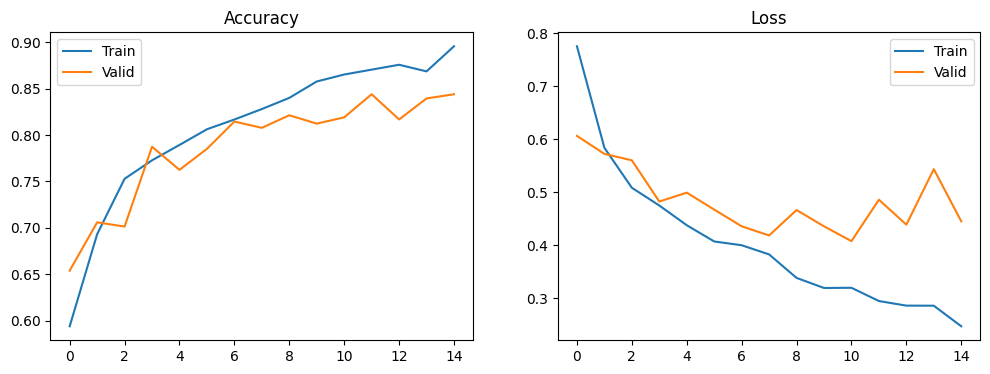

In [16]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(["Train","Valid"])

plt.subplot(1,2,2)
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title("Loss")
plt.legend(["Train","Valid"])

plt.show()


In [17]:
# 8. Transfer Learning (MobileNetV2)

In [18]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)
base_model.trainable = False

tl_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

tl_model.compile(optimizer="adam",
                 loss="binary_crossentropy",
                 metrics=["accuracy"])

tl_model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 14s 1us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [19]:
# 9. Train Transfer Learning Model

In [20]:
checkpoint_tl = tf.keras.callbacks.ModelCheckpoint(
    "mobilenet_best.h5",
    monitor="val_accuracy",
    save_best_only=True
)

history_tl = tl_model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10,
    callbacks=[checkpoint_tl]
)


Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 704ms/step - accuracy: 0.8279 - loss: 0.3331

84/84 ━━━━━━━━━━━━━━━━━━━━ 76s 809ms/step - accuracy: 0.8290 - loss: 0.3313 - val_accuracy: 0.9593 - val_loss: 0.1050
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 693ms/step - accuracy: 0.9803 - loss: 0.0626

84/84 ━━━━━━━━━━━━━━━━━━━━ 67s 789ms/step - accuracy: 0.9803 - loss: 0.0627 - val_accuracy: 0.9661 - val_loss: 0.0857
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9866 - loss: 0.0402

84/84 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.9866 - loss: 0.0402 - val_accuracy: 0.9683 - val_loss: 0.0856
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 83s 986ms/step - accuracy: 0.9901 - loss: 0.0306 - val_accuracy: 0.9593 - val_loss: 0.1028
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 73s 860ms/step - accuracy: 0.9900 - loss: 0.0330 - val_accuracy: 0.9683 - val_loss: 0.0752
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 73s 754ms/step - accuracy: 0.9937 - loss: 0.0256 - val_accuracy: 0.9638 - val_loss: 0.0758
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 64s 756ms/step - accuracy: 0.9943 - loss: 0.0164 - val_accuracy: 0.9683 - val_loss: 0.0858
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 66s 787ms/step - accuracy: 0.9978 - loss: 0.0101 - val_accuracy: 0.9638 - val_loss: 0.0780
Epoch 9/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 68s 802ms/step - accuracy: 0.9972 - loss: 0.0114 - val_accuracy: 0.9615 - val_loss: 0.0911
Epoch 10/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 68s 798ms/step - accuracy: 0.9978 - loss: 0.0113 - val_accuracy: 0.9683 

In [21]:
# 10. Plot Transfer Learning Curves

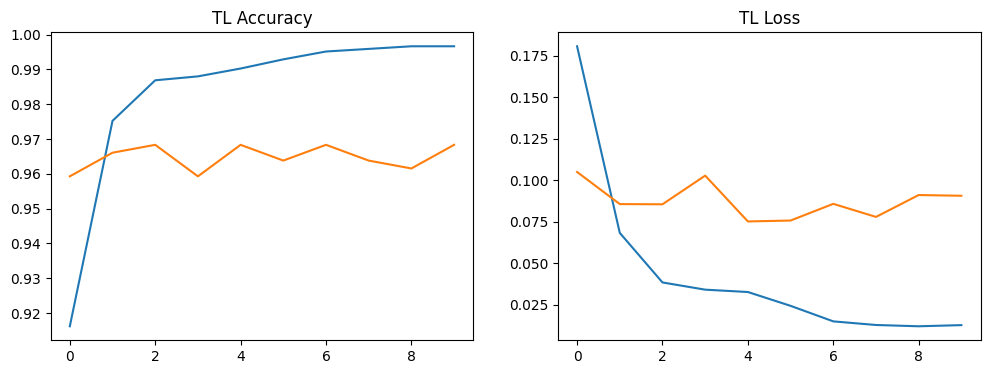

In [22]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_tl.history['accuracy'])
plt.plot(history_tl.history['val_accuracy'])
plt.title("TL Accuracy")

plt.subplot(1,2,2)
plt.plot(history_tl.history['loss'])
plt.plot(history_tl.history['val_loss'])
plt.title("TL Loss")

plt.show()


In [23]:
# 11. Evaluate Best Model

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       121
           1       0.99      0.98      0.98        94

    accuracy                           0.99       215
   macro avg       0.99      0.99      0.99       215
weighted avg       0.99      0.99      0.99       215



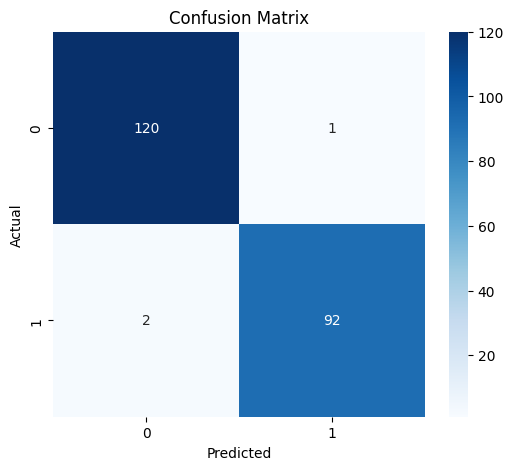

In [24]:
best_model = tf.keras.models.load_model("mobilenet_best.h5")

pred = best_model.predict(test_gen)
pred_classes = (pred > 0.5).astype("int32")

print("CLASSIFICATION REPORT:")
print(classification_report(test_gen.classes, pred_classes))

cm = confusion_matrix(test_gen.classes, pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Conclusion

# The Aerial Object Classification project successfully demonstrates the power of deep learning in solving real-world visual recognition challenges. By 
# building and comparing both a custom CNN and a transfer learning model (MobileNetV2), this work highlights how modern computer vision techniques can 
# accurately distinguish between birds and drones in aerial images. The MobileNetV2-based classifier achieved superior performance with high accuracy 
# and strong generalization capabilities, making it suitable for real-time surveillance and monitoring tasks.

# The project further translates the trained model into a practical, user-friendly Streamlit application that allows instant predictions with a simple 
# image upload interface. This deployment step bridges the gap between research and real-world usability, making the solution accessible to non-
# technical users such as wildlife researchers, security teams, and airport personnel.

# Although YOLO-based object detection was considered, classification alone proved sufficient for scenarios where object localization is not the primary 
# requirement. The modular structure of the project allows seamless future expansion into detection, tracking, and real-time video analytics. Overall, 
# the project demonstrates a complete machine learning workflow—from dataset preparation and model development to evaluation and deployment—resulting in 
# a reliable AI solution for aerial surveillance automation.

In [ ]:
# Business Impact

# This project delivers significant business value across multiple industries by enabling automated, accurate, and scalable identification of aerial 
# objects. In the aviation sector, the ability to distinguish between birds and drones can prevent runway closures, reduce bird-strike incidents, and 
# improve operational safety at airports. A reliable AI-based monitoring system also minimizes the dependence on manual observations, reducing 
# operational costs and improving decision-making speed.

# In the security and defense industry, the model can serve as a foundational component for perimeter monitoring systems. Detecting unauthorized drones 
# in restricted airspace is critical for preventing breaches, spying attempts, and smuggling operations. Integrating this classifier with existing CCTV 
# or aerial surveillance systems can greatly enhance threat detection and situational awareness.

# For wildlife and environmental agencies, the solution offers an efficient way to monitor bird populations without disturbing natural habitats. This 
# leads to better ecological research, conservation planning, and risk mitigation near industrial areas such as wind farms, where bird collisions are 
# common.

# Additionally, organizations can deploy this solution on edge devices or drones for autonomous monitoring, reducing the need for human-led surveillance 
# and enabling continuous 24/7 coverage at low cost. The flexibility, accuracy, and scalability of the model make it suitable for integration into smart 
# city infrastructures, wildlife conservation projects, and commercial drone management platforms.

# In summary, the project provides a low-cost yet high-impact AI tool that can significantly enhance safety, security, operational efficiency, and 
# sustainability across multiple sectors.